In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error


In [ ]:
dataset = pd.read_csv(r"C:\Users\Thiare\OneDrive\Escritorio\PROYECTO 3-4\dataset_final.csv")
# Eliminar la columna 'Brecha de género.1'
dataset = dataset.drop(columns=['Brecha de género.1'])
dataset

,Region,Año,Brecha Salarial,Ingreso mediano mensual Total,Ingreso mediano mensual Hombres,Ingreso mediano mensual Mujeres,Brecha de género,Año postulación,Estamento,Número total de postulantes,Número total de postulantes de mujeres,Número total de postulantes de hombres,Distribución porcentual de postulantes de mujeres,Distribución porcentual de postulantes de hombres
0,Arica y Parinacota,2018,-28.0,350.000,400.000,299.802,"-25,0",2018,Directiva,7.181,2.808,4.373,"39,1","60,9"
1,Arica y Parinacota,2018,-28.0,350.000,400.000,299.802,"-25,0",2018,Profesionales,75.313,40.697,34.616,"54,0","46,0"
2,Arica y Parinacota,2018,-28.0,350.000,400.000,299.802,"-25,0",2018,Profesional Ley N°15.076/19.664,0.000,0.000,0.000,"0,0","0,0"
3,Arica y Parinacota,2018,-28.0,350.000,400.000,299.802,"-25,0",2018,Fiscalizadores,6.658,2.706,3.952,"40,6","59,4"
4,Arica y Parinacota,2018,-28.0,350.000,400.000,299.802,"-25,0",2018,Técnicos,17.948,10.244,7.704,"57,1","42,9"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,Magallanes,2022,-21.6,603.124,713.448,502.604,"-29,6",2022,Fiscalizadores,9.011,4.020,4.991,"44,6","55,4"
636,Magallanes,2022,-21.6,603.124,713.448,502.604,"-29,6",2022,Técnicos,36.270,22.469,13.801,"61,9","38,1"
637,Magallanes,2022,-21.6,603.124,713.448,502.604,"-29,6",2022,Administrativos,39.392,24.194,15.198,"61,4","38,6"
638,Magallanes,2022,-21.6,603.124,713.448,502.604,"-29,6",2022,Auxiliares,12.867,5.285,7.582,"41,1","58,9"


In [ ]:
print(f"Dimensiones: {dataset.shape}")

Dimensiones: (640, 14)


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 14 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Region                                             640 non-null    object 
 1   Año                                                640 non-null    int64  
 2   Brecha Salarial                                    640 non-null    float64
 3   Ingreso mediano mensual Total                      640 non-null    float64
 4   Ingreso mediano mensual Hombres                    640 non-null    float64
 5   Ingreso mediano mensual Mujeres                    640 non-null    float64
 6   Brecha de género                                   640 non-null    object 
 7   Año postulación                                    640 non-null    int64  
 8   Estamento                                          640 non-null    object 
 9   Número tot

In [ ]:
# Verificar categorías únicas en columnas relevantes
print(dataset["Region"].unique())
print(dataset["Estamento"].unique())

['Arica y Parinacota' 'Tarapacá' 'Antofagasta' 'Atacama' 'Coquimbo'
 'Valparaíso' 'Metropolitana' "O'Higgins" 'Maule' 'Ñuble' 'Biobío'
 'La Araucanía' 'Los Ríos' 'Los Lagos' 'Aysén' 'Magallanes']
['Directiva' 'Profesionales' 'Profesional Ley N°15.076/19.664'
 'Fiscalizadores' 'Técnicos' 'Administrativos' 'Auxiliares' 'Otros']


In [ ]:
# Valores faltantes por columna
print(dataset.isnull().sum())

# Verificar duplicados
print(f"Filas duplicadas: {dataset.duplicated().sum()}")

Region                                               0
Año                                                  0
Brecha Salarial                                      0
Ingreso mediano mensual Total                        0
Ingreso mediano mensual Hombres                      0
Ingreso mediano mensual Mujeres                      0
Brecha de género                                     0
Año postulación                                      0
Estamento                                            0
Número total de postulantes                          0
Número total de postulantes de mujeres               0
Número total de postulantes de hombres               0
Distribución porcentual de postulantes de mujeres    0
Distribución porcentual de postulantes de hombres    0
dtype: int64
Filas duplicadas: 0


In [ ]:
# Eliminar espacios extra y saltos de línea
dataset.columns = dataset.columns.str.strip().str.replace('\n', '', regex=True)

# Verificar los nombres de las columnas después de la limpieza
print(dataset.columns)

Index(['Region', 'Año', 'Brecha Salarial', 'Ingreso mediano mensual Total',
       'Ingreso mediano mensual Hombres', 'Ingreso mediano mensual Mujeres',
       'Brecha de género', 'Año postulación', 'Estamento',
       'Número total de postulantes', 'Número total de postulantes de mujeres',
       'Número total de postulantes de hombres',
       'Distribución porcentual de postulantes de mujeres',
       'Distribución porcentual de postulantes de hombres'],
      dtype='object')


In [ ]:
print(type(dataset))


<class 'pandas.core.frame.DataFrame'>


******
**EDA**
******

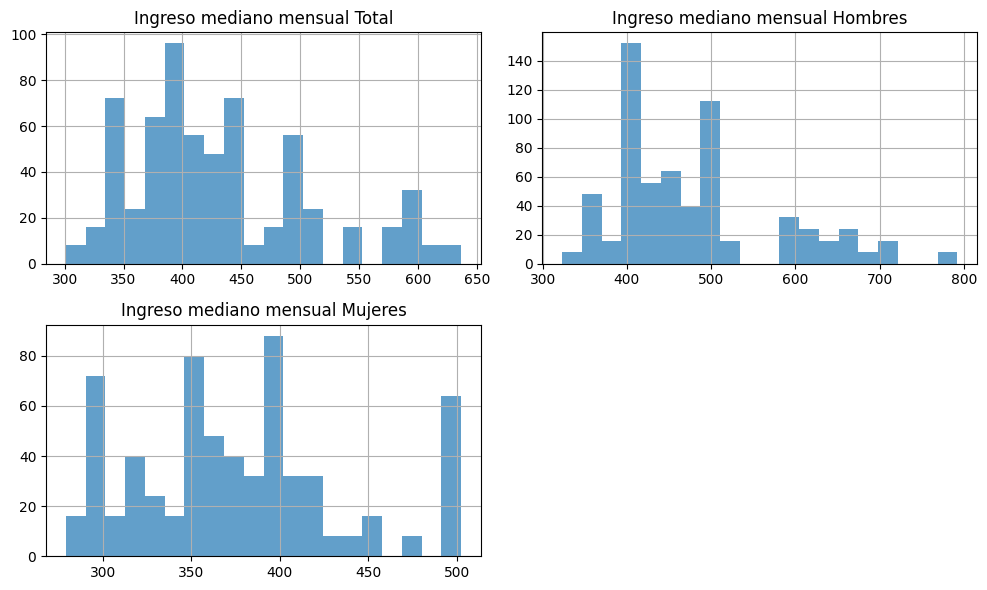

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma para los ingresos
dataset[["Ingreso mediano mensual Total", "Ingreso mediano mensual Hombres", "Ingreso mediano mensual Mujeres"]].hist(
    bins=20, figsize=(10, 6), alpha=0.7)
plt.tight_layout()
plt.show()

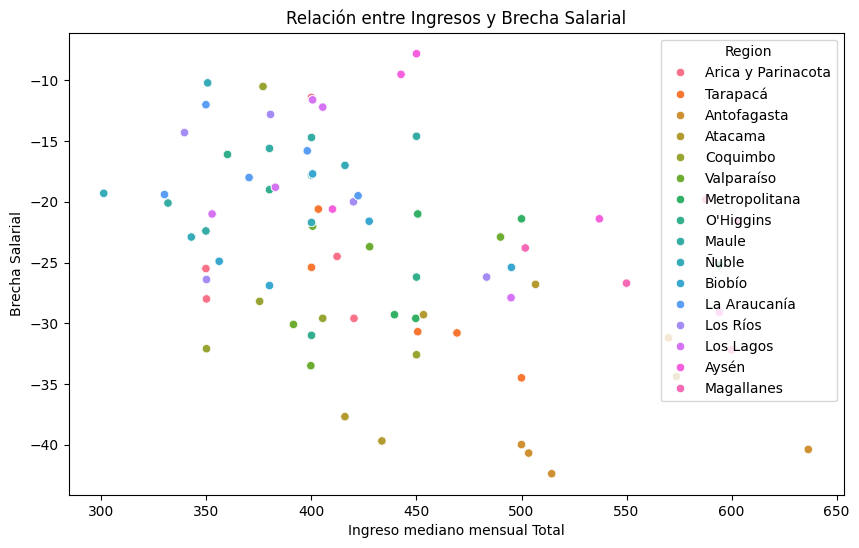

In [ ]:
# Gráfico de dispersión entre ingreso total y brecha salarial
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Ingreso mediano mensual Total", y="Brecha Salarial", hue="Region", data=dataset)
plt.title("Relación entre Ingresos y Brecha Salarial")
plt.show()

C:\Users\Thiare\AppData\Local\Temp\ipykernel_19228\2154030379.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Estamento", y="Número total de postulantes", data=dataset, estimator=sum, ci=None)


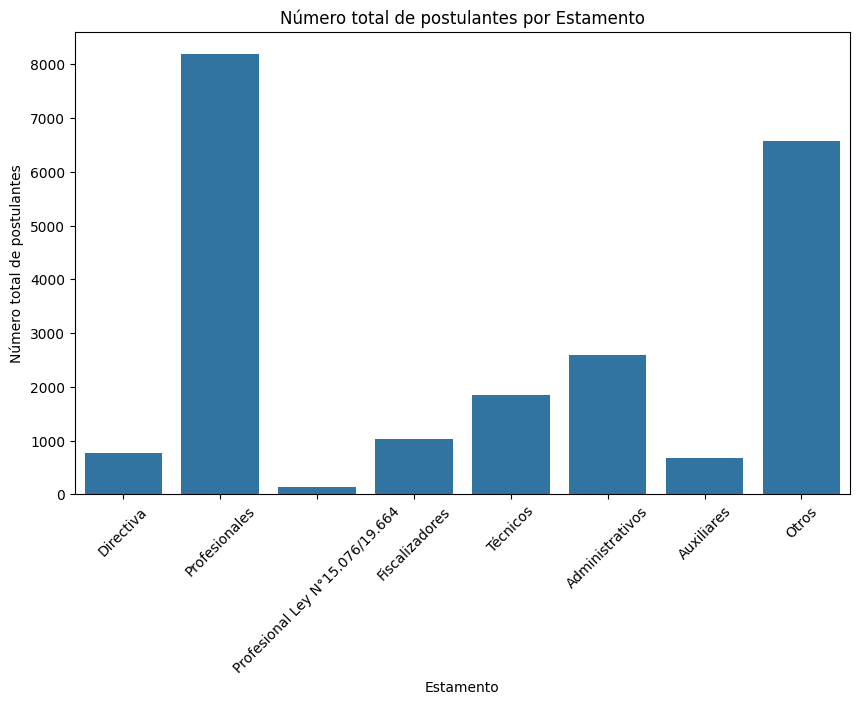

In [ ]:
# Conteo de postulantes por estamento
plt.figure(figsize=(10, 6))
sns.barplot(x="Estamento", y="Número total de postulantes", data=dataset, estimator=sum, ci=None)
plt.xticks(rotation=45)
plt.title("Número total de postulantes por Estamento")
plt.show()


**MODELO DE REGRESIÓN LINEAL**

In [ ]:
X = dataset[['Ingreso mediano mensual Total',
             'Ingreso mediano mensual Hombres',
             'Ingreso mediano mensual Mujeres',
             'Año',
             'Region',
             'Distribución porcentual de postulantes de mujeres',
             'Distribución porcentual de postulantes de hombres']]  # Variables independientes

X = pd.get_dummies(X, drop_first=True)

y = dataset['Brecha Salarial'] # Variable objetivo (brecha salarial)



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
#Modelo 1: Regresión Lineal
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

In [ ]:
#Evaluación del modelo de Regresión Lineal
print("Regresión Lineal:")
print(f"R²: {r2_score(y_test, y_pred_linear):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_linear)):.2f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_linear):.2f}")

Regresión Lineal:
R²: 0.66
RMSE: 4.59
MAE: 3.47


**MODELO DE RANDOM FOREST**

In [ ]:
#Modelo 2: Random Forest
random_forest_model = RandomForestRegressor(random_state=42, n_estimators=100)
random_forest_model.fit(X_train, y_train)
y_pred_rf = random_forest_model.predict(X_test)

In [ ]:
#Evaluación del modelo Random Forest
print("\nRandom Forest:")
print(f"R²: {r2_score(y_test, y_pred_rf):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_rf)):.2f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_rf):.2f}")


Random Forest:
R²: 1.00
RMSE: 0.09
MAE: 0.05


**VISUALIZACIONES**

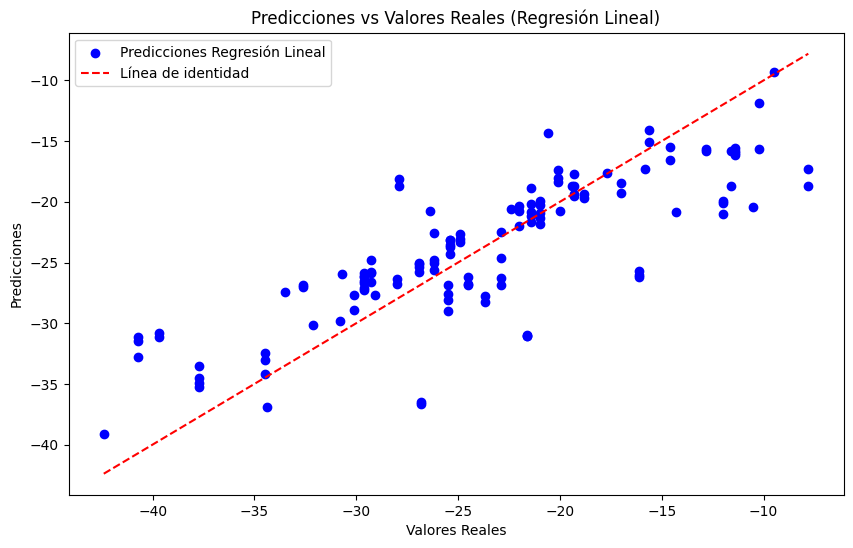

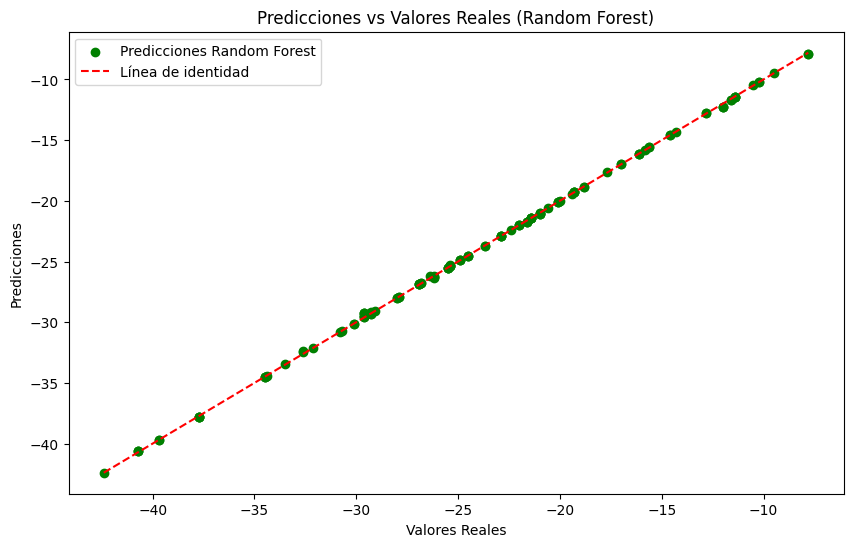

In [ ]:
import matplotlib.pyplot as plt

# Graficar las predicciones frente a los valores reales para regresión lineal
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred_linear, color='blue', label='Predicciones Regresión Lineal')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Línea de identidad')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores Reales (Regresión Lineal)')
plt.legend()
plt.show()

# Graficar las predicciones frente a los valores reales para Random Forest
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred_rf, color='green', label='Predicciones Random Forest')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Línea de identidad')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores Reales (Random Forest)')
plt.legend()
plt.show()


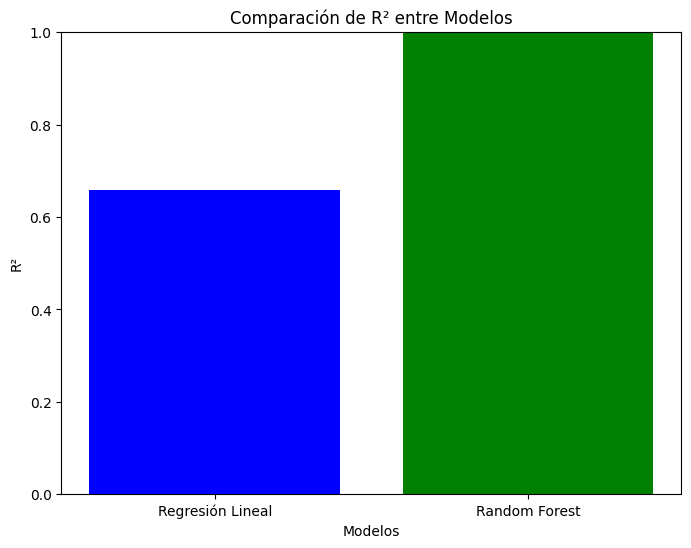

In [ ]:
# Definir las etiquetas de los modelos
labels = ['Regresión Lineal', 'Random Forest']

# Valores R²
r2_linear = r2_score(y_test, y_pred_linear)
r2_rf = r2_score(y_test, y_pred_rf)

# Graficar R²
r2_values = [r2_linear, r2_rf]

plt.figure(figsize=(8,6))
plt.bar(labels, r2_values, color=['blue', 'green'])
plt.xlabel('Modelos')
plt.ylabel('R²')
plt.title('Comparación de R² entre Modelos')
plt.ylim(0, 1)  # R² siempre está entre 0 y 1
plt.show()


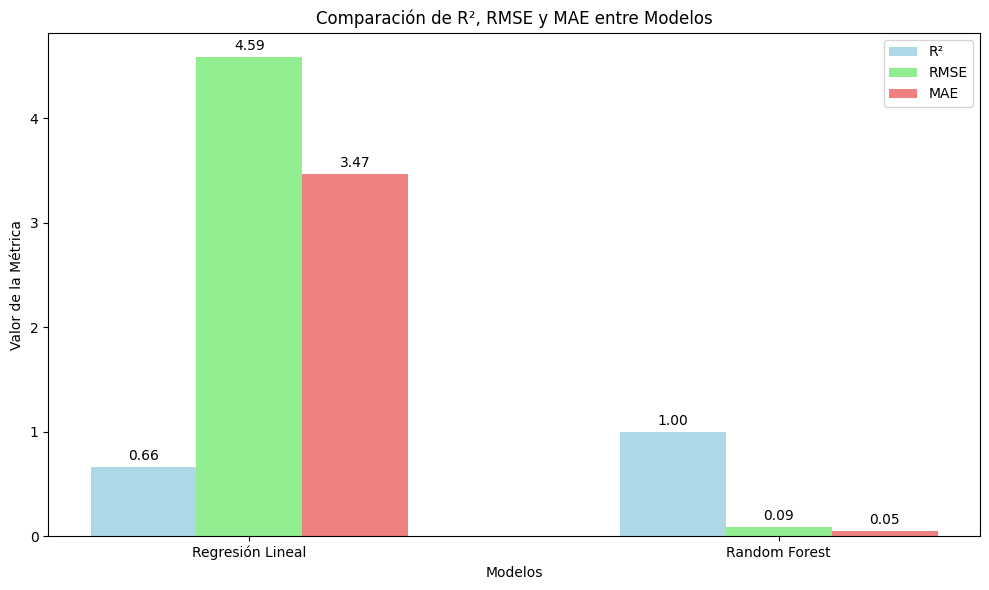

In [ ]:
# Definir las métricas
r2_linear = r2_score(y_test, y_pred_linear)
r2_rf = r2_score(y_test, y_pred_rf)

rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

mae_linear = mean_absolute_error(y_test, y_pred_linear)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

# Definir las etiquetas de los modelos
labels = ['Regresión Lineal', 'Random Forest']

# Crear los valores de las métricas
r2_values = [r2_linear, r2_rf]
rmse_values = [rmse_linear, rmse_rf]
mae_values = [mae_linear, mae_rf]

# Configurar la posición de las barras
x = np.arange(len(labels))  # Las posiciones para los modelos
width = 0.2  # El ancho de las barras

# Crear el gráfico
fig, ax = plt.subplots(figsize=(10,6))

# Graficar las tres métricas (R², RMSE, MAE) para cada modelo
rects1 = ax.bar(x - width, r2_values, width, label='R²', color='lightblue')
rects2 = ax.bar(x, rmse_values, width, label='RMSE', color='lightgreen')
rects3 = ax.bar(x + width, mae_values, width, label='MAE', color='lightcoral')

# Añadir texto en las barras
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 puntos de desplazamiento en el eje Y
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(rects1)
add_labels(rects2)
add_labels(rects3)

# Configurar los ejes
ax.set_xlabel('Modelos')
ax.set_ylabel('Valor de la Métrica')
ax.set_title('Comparación de R², RMSE y MAE entre Modelos')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.show()


Si el AUC de Random Forest es más alto que el de Regresión Logística, significa que Random Forest es mejor para clasificar la "Brecha Salarial" en esta conversión binaria.
La curva ROC muestra cómo cambian las tasas de verdaderos y falsos positivos a medida que se ajusta el umbral de decisión.

*Validación cruzada para ver si los modelos no estan con sobreajuste*

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Tu conjunto de datos X e y
X = dataset[['Ingreso mediano mensual Total',
             'Ingreso mediano mensual Hombres',
             'Ingreso mediano mensual Mujeres',
             'Año',
             'Region',
             'Distribución porcentual de postulantes de mujeres',
             'Distribución porcentual de postulantes de hombres']]  # Variables independientes

# Convertir columnas categóricas a numéricas si es necesario
X = pd.get_dummies(X, drop_first=True)

y = dataset['Brecha Salarial']  # Variable objetivo (brecha salarial)

# Dividir los datos para validación cruzada (puedes ajustar el número de "splits" según tus necesidades)
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # KFold con 5 divisiones

# Modelo de regresión lineal
linear_model = LinearRegression()

# Validación cruzada para el modelo de regresión lineal
cv_scores_linear = cross_val_score(linear_model, X, y, cv=kf, scoring='neg_mean_squared_error')  # Evaluación con MSE

# Calcular las métricas para regresión lineal
linear_rmse = np.sqrt(-cv_scores_linear)
print("Regresión Lineal - RMSE en validación cruzada:", linear_rmse)
print(f"Promedio de RMSE: {linear_rmse.mean():.2f}")
print(f"Desviación estándar de RMSE: {linear_rmse.std():.2f}")

# Modelo de Random Forest
rf_model = RandomForestRegressor(random_state=42)

# Validación cruzada para el modelo de Random Forest
cv_scores_rf = cross_val_score(rf_model, X, y, cv=kf, scoring='neg_mean_squared_error')  # Evaluación con MSE

# Calcular las métricas para Random Forest
rf_rmse = np.sqrt(-cv_scores_rf)
print("Random Forest - RMSE en validación cruzada:", rf_rmse)
print(f"Promedio de RMSE: {rf_rmse.mean():.2f}")
print(f"Desviación estándar de RMSE: {rf_rmse.std():.2f}")


Regresión Lineal - RMSE en validación cruzada: [4.58845192 4.52420422 4.56655503 4.70724067 4.74730262]
Promedio de RMSE: 4.63
Desviación estándar de RMSE: 0.09
Random Forest - RMSE en validación cruzada: [0.12891606 0.15251972 0.26529708 0.21926233 0.25813599]
Promedio de RMSE: 0.20
Desviación estándar de RMSE: 0.06


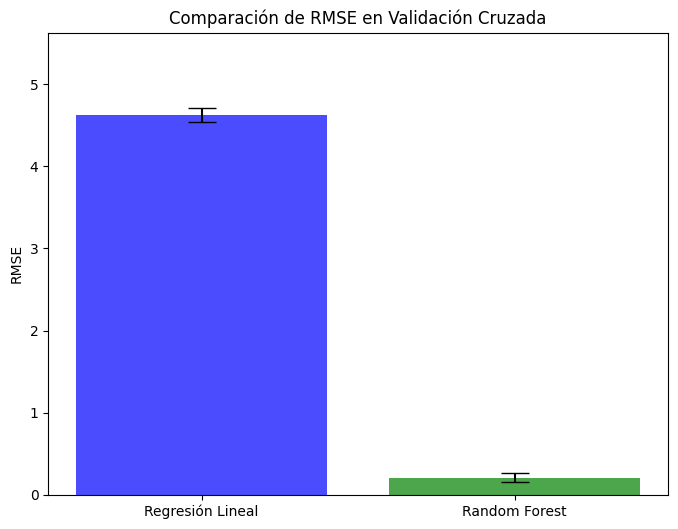

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Resultados de validación cruzada
rmse_linear = [4.58845192, 4.52420422, 4.56655503, 4.70724067, 4.74730262]
rmse_rf = [0.12891606, 0.15251972, 0.26529708, 0.21926233, 0.25813599]

# Promedios y desviaciones estándar
rmse_linear_mean = np.mean(rmse_linear)
rmse_rf_mean = np.mean(rmse_rf)

rmse_linear_std = np.std(rmse_linear)
rmse_rf_std = np.std(rmse_rf)

# Preparación de los datos para el gráfico
models = ['Regresión Lineal', 'Random Forest']
means = [rmse_linear_mean, rmse_rf_mean]
std_devs = [rmse_linear_std, rmse_rf_std]

# Creación del gráfico
fig, ax = plt.subplots(figsize=(8,6))

# Barras para el promedio de RMSE
ax.bar(models, means, yerr=std_devs, capsize=10, color=['blue', 'green'], alpha=0.7)

# Etiquetas y título
ax.set_ylabel('RMSE')
ax.set_title('Comparación de RMSE en Validación Cruzada')
ax.set_ylim(0, max(means) + 1)

# Mostrar el gráfico
plt.show()
